In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import json
from pathlib import Path

%matplotlib inline

# 2-D Poiesuille Flow
## Single Relaxation Time Model

nu = 0.02, uc = 2.500000e-02


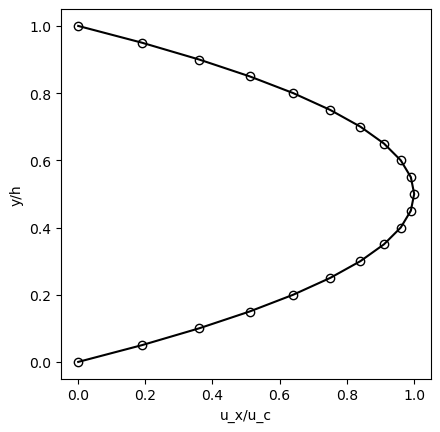

In [2]:
j = None
with open(Path('data/poiseuille.json'), mode='r') as f:
    j = json.load(f)

gx = j["externalForce"][0]
tau = j["singleRelaxationTimeModel"]["relaxationTime"]
ny = j["gridShape"][1]
nu = (tau - 0.5) / 3.0
h = float((ny - 1))
uc = gx*h**2/(8.0*nu)
print(f"nu = {nu:.2f}, uc = {uc:.6e}")

ux = np.loadtxt(Path(j["outputDirectory"]) / Path("ux.txt"))
x = ux / uc

y = np.loadtxt(Path(j["outputDirectory"]) / Path("y.txt"))
y /= h

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, "-o", color="k", fillstyle="none")
ax.set_xlabel("u_x/u_c")
ax.set_ylabel("y/h")
ax.set_aspect('equal')

## Multiple Relaxation Time Model

nu = 0.02, uc = 2.500000e-02


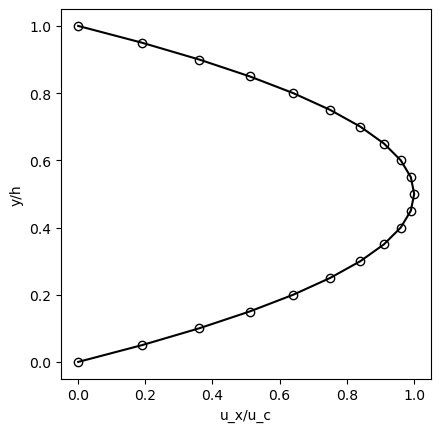

In [3]:
j = None
with open(Path('data/poiseuille_mrt.json'), mode='r') as f:
    j = json.load(f)

gx = j["externalForce"][0]
tau = j["multipleRelaxationTimeModel"]["tau"]
ny = j["gridShape"][1]
nu = (tau - 0.5) / 3.0
h = float((ny - 1))
uc = gx*h**2/(8.0*nu)
print(f"nu = {nu:.2f}, uc = {uc:.6e}")

ux = np.loadtxt(Path(j["outputDirectory"]) / Path("ux.txt"))
x = ux / uc

y = np.loadtxt(Path(j["outputDirectory"]) / Path("y.txt"))
y /= h

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, "-o", color="k", fillstyle="none")
ax.set_xlabel("u_x/u_c")
ax.set_ylabel("y/h")
ax.set_aspect('equal')

# 2-D Cavity Flow
## Single Relaxation Time Model

tau = 0.65, nu = 0.050000, Re = 100.0


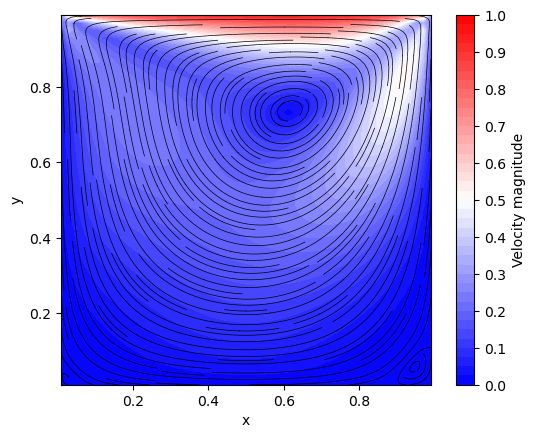

In [6]:
j = None
with open(Path('data/cavity_srt.json'), mode='r') as f:
    j = json.load(f)

nx = j["gridShape"][0]
ny = j["gridShape"][1]
lx = float(nx - 2)
ly = float(ny - 2)
u_wall = j["wallVelocity"]

dir = Path(j["outputDirectory"])
ux = np.loadtxt(dir / Path("ux.txt"))
uy = np.loadtxt(dir / Path("uy.txt"))
x = np.loadtxt(dir / Path("x.txt")) / lx
y = np.loadtxt(dir / Path("y.txt")) / ly

tau = j["singleRelaxationTimeModel"]["tau"]
nu = (tau - 0.5) / 3.0
Re = u_wall * lx / nu
# Relaxation time, dynamic viscosity, Reynolds number
print(f"tau = {tau}, nu = {nu:.6f}, Re = {Re:.1f}")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.streamplot(x, y, ux, uy, density=2, color="k", arrowstyle="-", linewidth=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xbound([0, 1])
ax.set_ybound([0, 1])
ax.set_aspect('equal')

u = np.sqrt(ux**2 + uy**2) / 0.1
levels = np.linspace(0, 1, 41)
cs = ax.contourf(x, y, u, levels=levels, cmap="bwr")
cbar = fig.colorbar(cs, ticks=np.linspace(0, 1, 11))
cbar.set_label("Velocity magnitude")

## Multiple Relaxation Time Model

tau = 0.5375, nu = 0.012500, Re = 400.0


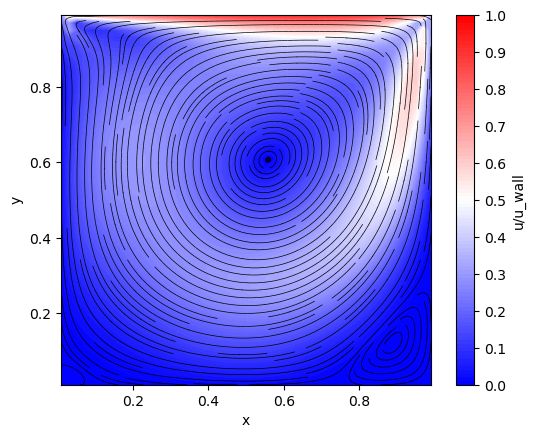

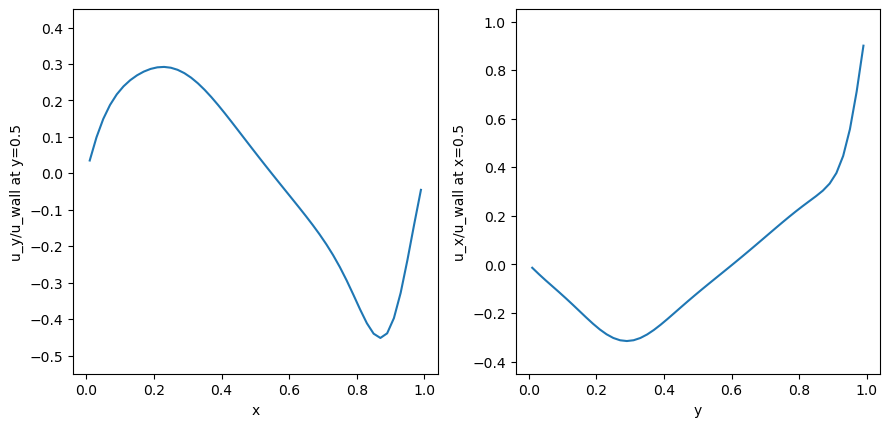

In [37]:
j = None
with open(Path('data/cavity_mrt.json'), mode='r') as f:
    j = json.load(f)

nx = j["gridShape"][0]
ny = j["gridShape"][1]
lx = float(nx - 2)
ly = float(ny - 2)
u_wall = j["wallVelocity"]

dir = Path(j["outputDirectory"])
ux = np.loadtxt(dir / Path("ux.txt"))
uy = np.loadtxt(dir / Path("uy.txt"))
x = np.loadtxt(dir / Path("x.txt")) / lx
y = np.loadtxt(dir / Path("y.txt")) / ly

tau = j["multipleRelaxationTimeModel"]["tau"]
nu = (tau - 0.5) / 3.0
Re = u_wall * lx / nu
# Relaxation time, dynamic viscosity, Reynolds number
print(f"tau = {tau}, nu = {nu:.6f}, Re = {Re:.1f}")

fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.streamplot(x, y, ux, uy, density=2, color="k", arrowstyle="-", linewidth=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xticks(np.linspace(0, 1, 6))
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_xbound([0, 1])
ax.set_ybound([0, 1])
ax.set_aspect('equal')

u = np.sqrt(ux**2 + uy**2) / u_wall
levels = np.linspace(0, 1, 101)
cs = ax.contourf(x, y, u, levels=levels, cmap="bwr")
ticks = np.linspace(0, 1, 11)
cbar = fig1.colorbar(cs, ticks=ticks)
cbar.set_label("u/u_wall")

fig2 = plt.figure(figsize=[9, 4.5])
ax1 = fig2.add_subplot(121)
ax1.plot(x[ny//2, :], uy[ny//2, :]/u_wall)
ax1.set_xticks(np.linspace(0, 1, 6))
ax1.set_yticks(np.linspace(-0.5, 0.4, 10))
ax1.set_ybound([-0.55, 0.45])
ax1.set_xlabel("x")
ax1.set_ylabel("u_y/u_wall at y=0.5")
ax1.set_aspect(1.0/ax1.get_data_ratio())

ax2 = fig2.add_subplot(122)
ax2.plot(y[:, nx//2], ux[:, nx//2]/u_wall)
ax2.set_xticks(np.linspace(0, 1, 6))
ax2.set_yticks(np.linspace(-0.4, 1.0, 8))
ax2.set_ybound([-0.45, 1.05])
ax2.set_xlabel("y")
ax2.set_ylabel("u_x/u_wall at x=0.5")
ax2.set_aspect(1.0/ax2.get_data_ratio())

plt.tight_layout()

## Central Moment Model

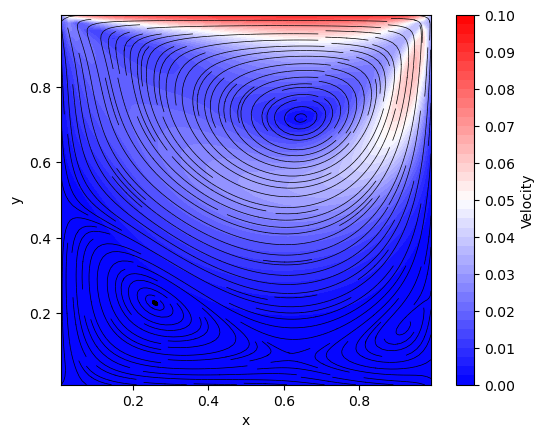

In [ ]:
j = None
with open(Path('data/cavity_cm.json'), mode='r') as f:
    j = json.load(f)

nx = j["gridShape"][0]
ny = j["gridShape"][1]
lx = float(nx - 2)
ly = float(ny - 2)
u_wall = j["wallVelocity"]

dir = Path(j["outputDirectory"])
ux = np.loadtxt(dir / Path("ux.txt"))
uy = np.loadtxt(dir / Path("uy.txt"))
x = np.loadtxt(dir / Path("x.txt")) / lx
y = np.loadtxt(dir / Path("y.txt")) / ly

fig = plt.figure()
ax = fig.add_subplot(111)
ax.streamplot(x, y, ux, uy, density=2, color="k", arrowstyle="-", linewidth=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xbound([0, 1])
ax.set_ybound([0, 1])
ax.set_aspect('equal')

u = np.sqrt(ux**2 + uy**2)
levels = np.linspace(0, u_wall, 41)
cs = ax.contourf(x, y, u, levels=levels, cmap="bwr")
ticks = np.linspace(0, u_wall, 11)
cbar = fig.colorbar(cs, ticks=ticks)
cbar.set_label("Velocity")

# Benchmarks of equilibrium distribution function calculation

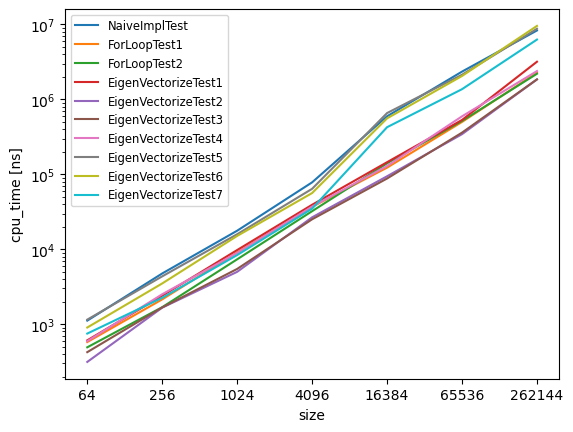

In [ ]:
from pathlib import Path
import pandas as pd

path = Path("result/feq-benchmark-result.csv")
if path.exists():    
    df = pd.read_csv(path, skiprows=8)
    df2 = df["name"].str.split("/", expand=True)
    df2 = df2.rename(columns={0: 'fixture', 1:'test', 2:'size'})
    df3 = pd.concat([df2[['test', 'size']], df["cpu_time"]], axis=1)
    tests = df3["test"].unique()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    for test in tests:
        rows = df3["test"] == test
        ax.plot(df3.loc[rows, "size"], df.loc[rows, "cpu_time"], label=test)
    ax.set_ylabel("cpu_time [ns]")
    ax.set_xlabel("size")
    ax.set_yscale("log")
    ax.legend(fontsize="small")
    ax.set_aspect("equal")
    